In [1]:
import pandas as pd

df = pd.read_csv("C:\\Users\\ncvn\\.cache\\kagglehub\\datasets\\wcukierski\\enron-email-dataset\\versions\\2\\emails.csv")

In [2]:
VECTOR_DB_NAME = "email_faiss_350c_50ov"

In [3]:

print(df.head())  
print(df.info()) 
print(df.columns) 

                       file                                            message
0     allen-p/_sent_mail/1.  Message-ID: <18782981.1075855378110.JavaMail.e...
1    allen-p/_sent_mail/10.  Message-ID: <15464986.1075855378456.JavaMail.e...
2   allen-p/_sent_mail/100.  Message-ID: <24216240.1075855687451.JavaMail.e...
3  allen-p/_sent_mail/1000.  Message-ID: <13505866.1075863688222.JavaMail.e...
4  allen-p/_sent_mail/1001.  Message-ID: <30922949.1075863688243.JavaMail.e...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517401 entries, 0 to 517400
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   file     517401 non-null  object
 1   message  517401 non-null  object
dtypes: object(2)
memory usage: 7.9+ MB
None
Index(['file', 'message'], dtype='object')


In [4]:
df['file'][0]

'allen-p/_sent_mail/1.'

In [5]:
from pprint import pprint
pprint(df['message'][30000])

('Message-ID: <6440303.1075855883977.JavaMail.evans@thyme>\n'
 'Date: Sun, 10 Dec 2000 06:32:00 -0800 (PST)\n'
 'From: veronica.espinoza@enron.com\n'
 'To: debbie.brackett@enron.com, william.bradford@enron.com, \n'
 '\tandrew.conner@enron.com, genia.fitzgerald@enron.com, \n'
 '\tpatrick.hanse@enron.com, kelly.lovvorn@enron.com, \n'
 '\tmelissa.murphy@enron.com, kyle.schultz@enron.com, \n'
 '\tkim.theriot@enron.com, greg.wolfe@enron.com, \n'
 '\tchristian.yoder@enron.com, donald.black@enron.com, \n'
 '\twinston.cheng@enron.com, paul.choi@enron.com, \n'
 '\tdavid.fairley@enron.com, mike.miller@enron.com, \n'
 '\tpatrice.mims@enron.com, steve.neal@enron.com, \n'
 '\tkimberly.olinger@enron.com, charles.otto@enron.com, \n'
 '\tlee.papayoti@enron.com, david.parquet@enron.com, \n'
 '\tsusan.pereira@enron.com, beth.perlman@enron.com, \n'
 '\tbo.petersen@enron.com, sylvia.pollan@enron.com, \n'
 '\tbrent.price@enron.com, daniel.reck@enron.com, \n'
 '\tleslie.reeves@enron.com, brian.riley@enron.c

In [6]:
import random
str(df['message'][random.randint(0,5000)]).split()

['Message-ID:',
 '<32673281.1075855680716.JavaMail.evans@thyme>',
 'Date:',
 'Wed,',
 '25',
 'Oct',
 '2000',
 '09:08:00',
 '-0700',
 '(PDT)',
 'From:',
 'phillip.allen@enron.com',
 'To:',
 'bob.m.hall@enron.com',
 'Subject:',
 'Cc:',
 'robert.superty@enron.com,',
 'randall.gay@enron.com',
 'Mime-Version:',
 '1.0',
 'Content-Type:',
 'text/plain;',
 'charset=us-ascii',
 'Content-Transfer-Encoding:',
 '7bit',
 'Bcc:',
 'robert.superty@enron.com,',
 'randall.gay@enron.com',
 'X-From:',
 'Phillip',
 'K',
 'Allen',
 'X-To:',
 ')bob.m.hall@enron.com',
 'X-cc:',
 'Robert',
 'Superty,',
 'Randall',
 'L',
 'Gay',
 'X-bcc:',
 'X-Folder:',
 '\\Phillip_Allen_Dec2000\\Notes',
 'Folders\\Sent',
 'X-Origin:',
 'Allen-P',
 'X-FileName:',
 'pallen.nsf',
 'Bob,',
 'Patti',
 'Sullivan',
 'held',
 'together',
 'the',
 'scheduling',
 'group',
 'for',
 'two',
 'months',
 'while',
 'Randy',
 'Gay',
 'was',
 'on',
 'a',
 'personal',
 'leave.',
 'She',
 'displayed',
 'a',
 'tremendous',
 'amount',
 'of',
 'com

In [29]:
import faiss
import numpy as np
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_community.vectorstores import FAISS
from langchain_text_splitters import RecursiveCharacterTextSplitter, SentenceTransformersTokenTextSplitter


# Use Microsoft E5 model instead of MPNet
model_kwargs = {'device': 'cpu'}
encode_kwargs = {'normalize_embeddings': True}  # Use cosine similarity
model = HuggingFaceEmbeddings(
    model_name="intfloat/e5-base-v2", 
    model_kwargs=model_kwargs,
    encode_kwargs=encode_kwargs,
)


c:\DEV\WebdevFolder\RealEstateAI\.venv\Lib\site-packages\huggingface_hub\file_download.py:795: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [32]:
# text_splitter = RecursiveCharacterTextSplitter(chunk_size=350, chunk_overlap=50)

#Relies on tiktoken, cant use because tiktoken support only GPT
text_splitter = SentenceTransformersTokenTextSplitter(chunk_size=350, model_name="intfloat/e5-base-v2", chunk_overlap=50)
email_texts = df["message"].iloc[:300].dropna().tolist()

In [33]:
len(email_texts)

300

In [ ]:
# from langchain_core.documents import Document
# import pprint

# import spacy

# nlp = spacy.load("en_core_web_sm")
# print('nlp loaded')

# def lemmatize_text(text):
#     doc = nlp(text)
#     return " ".join([token.lemma_ for token in doc if not token.is_punct])


# docslist = []
# for i, ec in enumerate(email_texts):
#     #pprint.pprint(ec.split())
    
#     split_msg = ec.split()
#     msg_start = split_msg.index("X-FileName:")
#     sender = split_msg[split_msg.index("From:")+1]
#     recips = []
#     #print(f'EMAIL CHUNK {i}\n\n',ec.split()[msg_start+3:])
#     try:
#         for idx in range(split_msg.index("To:")+1, split_msg.index("Subject:")):
#             recips.append(split_msg[idx])
#     except:
#         for idx in range(split_msg.index("X-To:")+1, split_msg.index("Subject:")):
#             recips.append(split_msg[idx])

#     subject_start_idx = split_msg.index("Subject:")
#     subject_end_idx = split_msg.index("Mime-Version:")

#     date_idx = split_msg.index("Date:")+1
#     date_idx_end = date_idx + 6

#     full_content = " ".join(split_msg[subject_start_idx:subject_end_idx]) + "|"
#     full_content += " ".join(split_msg[msg_start+3:])

#     lemmatized_content = lemmatize_text(full_content)
#     #print('text lemmatized')
#     #docslist.append(Document(page_content=full_content, metadata={"sender":sender,"recipient":" ".join(recips),"date":" ".join(split_msg[date_idx : date_idx_end])}))
#     prefix = {"sender":sender,"recipient":" ".join(recips),"date":" ".join(split_msg[date_idx : date_idx_end])}
#     #print(list(zip(prefix.keys(),prefix.values())))
#     final_list = text_splitter.split_text(lemmatized_content)
#     #print('final_list prepared')
#     #print(list(zip(prefix.keys(),prefix.values()))+final_list)
#     for f in final_list:
#         docslist.append("passage: " + str(list(zip(prefix.keys(),prefix.values())))+f)

nlp loaded


In [35]:
from langchain_core.documents import Document
import pprint

docslist_no_lemma = []
for i, ec in enumerate(email_texts):
    #pprint.pprint(ec.split())
    
    split_msg = ec.split()
    msg_start = split_msg.index("X-FileName:")
    sender = split_msg[split_msg.index("From:")+1]
    recips = []
    #print(f'EMAIL CHUNK {i}\n\n',ec.split()[msg_start+3:])
    try:
        for idx in range(split_msg.index("To:")+1, split_msg.index("Subject:")):
            recips.append(split_msg[idx])
    except:
        for idx in range(split_msg.index("X-To:")+1, split_msg.index("Subject:")):
            recips.append(split_msg[idx])

    subject_start_idx = split_msg.index("Subject:")
    subject_end_idx = split_msg.index("Mime-Version:")

    date_idx = split_msg.index("Date:")+1
    date_idx_end = date_idx + 6

    full_content = " ".join(split_msg[subject_start_idx:subject_end_idx]) + "|"
    full_content += " ".join(split_msg[msg_start+3:])

    #docslist.append(Document(page_content=full_content, metadata={"sender":sender,"recipient":" ".join(recips),"date":" ".join(split_msg[date_idx : date_idx_end])}))
    prefix = {"sender":sender,"recipient":" ".join(recips),"date":" ".join(split_msg[date_idx : date_idx_end])}
    #print(list(zip(prefix.keys(),prefix.values())))
    final_list = text_splitter.split_text(full_content)
    #print('final_list prepared')
    #print(list(zip(prefix.keys(),prefix.values()))+final_list)
    for f in final_list:
        docslist_no_lemma.append("passage: " + str(list(zip(prefix.keys(),prefix.values())))+f)

In [55]:
docslist = docslist_no_lemma

In [56]:
len(docslist)

371

In [57]:
final_doc_list = []

In [59]:
for d1,d2 in zip(docslist,docslist_no_lemma):
    # idx = d1.find("]") + 1
    # print(d1[idx:])
    # print(d2[idx:])
    

    final_doc_list.append(Document(page_content=d1))

In [60]:
db = FAISS.from_documents(final_doc_list[:300], model)
db.save_local(VECTOR_DB_NAME)

In [40]:
docslist = final_doc_list

In [61]:
# batch_size = 20
# for i in range(0, len(docslist), batch_size):
#     batch_docs = docslist[i : i + batch_size]  
#     await db.aadd_documents(batch_docs)  
#     print(f"Batch {i // batch_size} added ({len(batch_docs)} docs).")

import asyncio
import concurrent.futures
from langchain_community.vectorstores import FAISS
def process_batch_sync(db, batch_docs, batch_id):
    loop = asyncio.new_event_loop()
    asyncio.set_event_loop(loop)
    loop.run_until_complete(db.aadd_documents(batch_docs))
    loop.close()
    print(f"Batch {batch_id} added ({len(batch_docs)} docs).")

async def batch_insert(db, docslist, batch_size=20, num_workers=6):
    loop = asyncio.get_running_loop()
    
    with concurrent.futures.ThreadPoolExecutor(max_workers=num_workers) as executor:
        tasks = []
        
        for i in range(0, len(docslist), batch_size):
            batch_docs = docslist[i : i + batch_size]
            batch_id = i // batch_size
            tasks.append(loop.run_in_executor(executor, process_batch_sync, db, batch_docs, batch_id))
        
        await asyncio.gather(*tasks) 

# Run the optimized batch insertion
# await batch_insert(db, docslist, batch_size=40)

In [62]:
db.save_local(VECTOR_DB_NAME)
print("FAISS index updated and saved")

FAISS index updated and saved


In [63]:
db = FAISS.load_local(VECTOR_DB_NAME,model,allow_dangerous_deserialization=True)

In [64]:
model

HuggingFaceEmbeddings(client=SentenceTransformer(
  (0): Transformer({'max_seq_length': 512, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  (2): Normalize()
), model_name='intfloat/e5-base-v2', cache_folder=None, model_kwargs={}, encode_kwargs={'normalize_embeddings': True}, multi_process=False, show_progress=False)

In [65]:
from initialize_groq import init_groq
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain.chains.retrieval import create_retrieval_chain
from langchain_core.prompts import ChatPromptTemplate

prompt = ChatPromptTemplate.from_template(
        """
            Answer question only provided the context. Give a detailed answer IN minimum 5 sentences!
            SAY I DONT KNOW IF CONTEXT IS NOT ENOUGH. DONT MAKE UP ANSWERS. BUT YOU ARE FREE TO INFER/SUGGEST.
            {context}

            Here is question:
            {input}
        """
)

retriever = db.as_retriever(search_kwargs={'k':20, 'search_type':'mmr','lambda_mult':0.2})

_, llm = init_groq(model_name="llama-3.3-70b-versatile")
import random
from initialize_groq import api_keys
llm.groq_api_key = random.choice(api_keys)
document_chain = create_stuff_documents_chain(llm, prompt)
retrieval_chain = create_retrieval_chain(retriever, document_chain)

# Retrieve Top-K Similar Documents (Initial Broad Search)
retriever_topk = db.as_retriever(search_kwargs={'k': 20,'fetch_k' : 100, 'search_type': 'similarity'})  # Retrieve more docs first

# MMR for Diversity (Reduce Redundant Docs)
retriever_mmr = db.as_retriever(search_kwargs={'k': 20, 'fetch_k' : 100, 'search_type': 'mmr'})  

# Create the Hybrid Retrieval Pipeline
retrieval_chain_topk = create_retrieval_chain(retriever_topk, document_chain)  # Initial broad search
retrieval_chain_mmr = create_retrieval_chain(retriever_mmr, document_chain)    # Apply MMR re-ranking
# retrieval_chain_threshold = create_retrieval_chain(retriever_threshold, document_chain)  # Final filtering

In [66]:
for d in docslist:
    print(d)

passage: [('sender', 'phillip.allen@enron.com'), ('recipient', 'tim.belden@enron.com'), ('date', 'Mon, 14 May 2001 16:39:00 -0700')]subject : | here is our forecast
passage: [('sender', 'phillip.allen@enron.com'), ('recipient', 'john.lavorato@enron.com'), ('date', 'Fri, 4 May 2001 13:51:00 -0700')]subject : re : | traveling to have a business meeting takes the fun out of the trip. especially if you have to prepare a presentation. i would suggest holding the business plan meetings here then take a trip without any formal business meetings. i would even try and get some honest opinions on whether a trip is even desired or necessary. as far as the business meetings, i think it would be more productive to try and stimulate discussions across the different groups about what is working and what is not. too often the presenter speaks and the others are quiet just waiting for their turn. the meetings might be better if held in a round table discussion format. my suggestion for where to go is a

In [67]:
import pprint
query = "query: give me emails related to enron scandal"
pprint.pprint(retrieval_chain_topk.invoke({"input":query}))
llm.groq_api_key = random.choice(api_keys)
pprint.pprint(retrieval_chain_mmr.invoke({"input":query}))

{'answer': 'Based on the provided context, it appears that all the passages '
           'are related to Enron, as they all contain Enron email addresses '
           "and seem to be work-related communications. However, it's "
           'essential to note that none of the passages explicitly mention the '
           'Enron scandal. The Enron scandal, which involved accounting fraud '
           "and corruption, led to the company's bankruptcy in 2001.\n"
           '\n'
           'Given the time period of the emails (2000-2001), it is possible '
           'that some of these emails might be related to the events leading '
           'up to the scandal or the scandal itself, but without more specific '
           "information, it's difficult to determine which emails are directly "
           'related to the scandal.\n'
           '\n'
           'Some emails that might be of interest, given their content and the '
           'time period, include:\n'
           '\n'
           '* T

In [69]:
query = "query: "
query += "give me emails related to enron scandal"

mmr_scores = db.max_marginal_relevance_search_with_score_by_vector(embedding=model.embed_query(query), k = 20, fetch_k=100, lambda_mult=0.5)

mmr_list = [(doc.page_content, score) for doc, score in mmr_scores]

for doc, score in mmr_list:
    print(f"Document: {doc[doc.find("]")+1:doc.find("]")+100]} | MMR Score: {score}")

Document: ~ ~ ~ ~ ~ ~ ~ sure you want to unsubscribe and stop receiving e - mail from us? all right... click  | MMR Score: 0.2502261996269226
Document: subject : re : sw gas | forwarded by phillip k allen / hou / ect on 04 / 28 / 2000 09 : 02 am - - - | MMR Score: 0.30852818489074707
Document: , = tracy wood / na / enron @ enron, gabriel fuzat / enron communications @ enron commun = ications | MMR Score: 0.30405181646347046
Document: subject : re : desk to desk access request | i received your email about setting up paul lucci and  | MMR Score: 0.3080962300300598
Document: subject : re : 2001 margin plan | 35 million is fine phillip | MMR Score: 0.30097508430480957
Document: subject : re : analyst resume - rafael avila | send to karen buckley. trading track interview to be | MMR Score: 0.3099333643913269
Document: subject : re : security request : clog - 4nnjez has been denied. | are his requests coming to me? | MMR Score: 0.27997249364852905
Document: subject : re : not business relat

HYPERPARAMETER OPTIMIZATION STUDY

In [48]:
import optuna
import numpy as np
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_community.vectorstores import FAISS

# Load the Hugging Face E5 embedding model
model = HuggingFaceEmbeddings(
    model_name="intfloat/e5-base-v2",
    encode_kwargs={"normalize_embeddings": True}
)

def objective(trial):
    # Hyperparameters to optimize:
    chunk_size = trial.suggest_int("chunk_size", 100, 500, step=50)
    chunk_overlap = trial.suggest_int("chunk_overlap", 10, 100, step=10)
    lambda_mult = trial.suggest_float("lambda_mult", 0.0, 1.0, step=0.1)

    # Use RecursiveCharacterTextSplitter for sliding window chunking
    text_splitter = RecursiveCharacterTextSplitter(
        chunk_size=chunk_size, 
        chunk_overlap=chunk_overlap
    )
    # Join all emails and split into chunks
    email_chunks = text_splitter.split_text("\n".join(email_texts))
    
    # Build FAISS vectorstore from the chunks
    vectorstore = db

    # Define your retrieval query
    query = "query: give me emails related to enron scandal"
    
    # Perform MMR retrieval with the current lambda_mult
    mmr_results = vectorstore.max_marginal_relevance_search_with_score_by_vector(
        embedding=model.embed_query(query),
        k=20,
        fetch_k=100,
        lambda_mult=lambda_mult
    )
    
    # Extract the MMR scores from the results
    scores = [score for doc, score in mmr_results]
    avg_mmr = np.mean(scores)
    
    # Log parameters and average MMR for debugging
    trial.set_user_attr("num_chunks", len(email_chunks))
    trial.set_user_attr("avg_mmr", avg_mmr)
    
    # We aim to maximize the average MMR score
    return avg_mmr

# Run the hyperparameter search using Optuna
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

print("Best Chunking Params:", study.best_params)
print("Best Average MMR Score:", study.best_value)


c:\DEV\WebdevFolder\RealEstateAI\.venv\Lib\site-packages\huggingface_hub\file_download.py:795: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
[I 2025-03-07 16:47:18,418] A new study created in memory with name: no-name-46d8d196-8f72-426f-adfd-d3b01287c4fd
[I 2025-03-07 16:47:18,941] Trial 0 finished with value: 0.2761170268058777 and parameters: {'chunk_size': 200, 'chunk_overlap': 90, 'lambda_mult': 0.8}. Best is trial 0 with value: 0.2761170268058777.
[I 2025-03-07 16:47:19,068] Trial 1 finished with value: 0.2802850008010864 and parameters: {'chunk_size': 400, 'chunk_overlap': 60, 'lambda_mult': 0.4}. Best is trial 1 with value: 0.2802850008010864.
[I 2025-03-07 16:47:19,202] Trial 2 finished with value: 0.2761170268058777 and parameters: {'chunk_size': 150, 'chunk_overlap': 70, 'lambda_mult': 0.8}. Best is trial 1 with value: 

Best Chunking Params: {'chunk_size': 100, 'chunk_overlap': 10, 'lambda_mult': 0.0}
Best Average MMR Score: 0.28083083033561707


In [49]:
# for doc in docslist:
#     print(len(doc.page_content.split()))
    

In [50]:
from langchain_core.tools import tool

# Ensure retrieval_chain is correctly defined before calling this tool
@tool
def ragtool(query: str) -> str:
    """
    This is a retrieval-augmented generation (RAG) tool that queries a vector store 
    containing Enron emails.
    
    Parameters:
    query (str): The input query for retrieval.
    
    Returns:
    str: The retrieved answer from the vector store.
    """
    try:
        answer = retrieval_chain_mmr.invoke({"input": query})['answer']
        return f"Here is the ANSWER. \n ```{answer}```\n DO NOT USE THE TOOL REPEATEDLY. SHOW THE ANSWER TO THE USER. \n"
    except Exception as e:
        return f"Error: Failed to retrieve answer. Details: {str(e)}"


In [51]:
from typing import Literal
from langchain_core.runnables.history import RunnableWithMessageHistory
from langgraph.graph import StateGraph, START, END, MessagesState
from langgraph.checkpoint.memory import MemorySaver
from langchain.memory import ChatMessageHistory
from langchain_core.chat_history import BaseChatMessageHistory
from langchain_core.chat_history import InMemoryChatMessageHistory
from langchain_core.runnables.history import RunnableWithMessageHistory
from langgraph.prebuilt import ToolNode, tools_condition



toolnode = ToolNode([ragtool])

def call_model(state: MessagesState):
    state["messages"]
    messages = state["messages"]
    #print(messages)
    llm.groq_api_key = random.choice(api_keys)
    llm_with_tool = llm.bind_tools([ragtool])
    response = llm_with_tool.invoke(messages)
    
    
    return {"messages": [response]}

from langgraph.graph import END
def router_function(state: MessagesState) -> Literal["tools", END]:
    messages = state["messages"]
    last_message = messages[-1]
    if last_message.tool_calls:
        return "tools"
    return END

memory = MemorySaver()
workflow = StateGraph(MessagesState)    
workflow.add_node("agent", call_model)
workflow.add_node(toolnode)
workflow.add_edge(START, "agent")
workflow.add_conditional_edges(
    "agent",
    router_function,
    {
       "tools": "tools",
       END: END,
    },
)
workflow.add_edge("tools", "agent")
app = workflow.compile(checkpointer=memory)



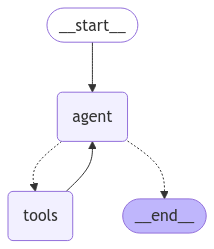

In [52]:
from IPython.display import display_png
display_png(app.get_graph().draw_mermaid_png(),raw=True)

In [53]:
import time
while True:
    theinput = input("Enter something: ")
    if 'exit' in theinput:
        break
    inp = {"messages":[theinput]}
    
    config = {"configurable": {"thread_id": 1}}
    events = app.stream(inp, config=config, stream_mode="values")

    for event in events:
        event["messages"][-1].pretty_print()
    time.sleep(1)

In [54]:
# from typing import Literal, List
# from langchain_core.runnables.history import RunnableWithMessageHistory
# from langgraph.graph import StateGraph, START, END, MessagesState
# from langgraph.checkpoint.memory import MemorySaver
# from langchain.memory import ChatMessageHistory
# from langchain_core.chat_history import BaseChatMessageHistory, InMemoryChatMessageHistory
# from langgraph.prebuilt import ToolNode
# from langchain_core.documents import Document
# from langchain_core.tools import tool
# from langchain.chat_models import ChatOpenAI
# from langchain_core.prompts import ChatPromptTemplate

# # === Define Custom Tools ===


# @tool
# def filter_emails_by_keyword(emails: List[Document], keywords: List[str]) -> List[Document]:
#     """Filter emails that contain the given keywords in the content or metadata."""
#     def filter_email(email):
#         content = email.page_content.lower()
#         metadata = " ".join(str(val).lower() for val in email.metadata.values())
#         return any(keyword.lower() in content or keyword.lower() in metadata for keyword in keywords)
    
#     with concurrent.futures.ThreadPoolExecutor() as executor:
#         filtered_emails = list(filter(None, executor.map(lambda e: e if filter_email(e) else None, emails)))

#     return filtered_emails

# @tool
# def filter_emails_by_metadata(
#     emails: List[Document], sender: str = None, recipient: str = None, date: str = None
# ) -> List[Document]:
#     """Filter emails by metadata fields like sender, recipient, or date."""
#     def filter_email(email):
#         if sender and email.metadata.get("sender", "").lower() != sender.lower():
#             return None
#         if recipient and recipient.lower() not in email.metadata.get("recipient", "").lower():
#             return None
#         if date and date not in email.metadata.get("date", ""):
#             return None
#         return email
    
#     with concurrent.futures.ThreadPoolExecutor() as executor:
#         filtered_emails = list(filter(None, executor.map(filter_email, emails)))
    
#     return filtered_emails

# @tool
# def summarize_emails(emails: List[Document]) -> List[Document]:
#     """Summarize emails before adding them to FAISS."""
#     _,llm = init_groq(model_name="llama-3.3-70b-versatile")
#     prompt = ChatPromptTemplate.from_template("Summarize the following email:\n{email}")
#     summarized_docs = []
#     for email in emails:
#         chain = prompt | llm
#         summary = chain.invoke(email.page_content)
#         summarized_docs.append(Document(page_content=summary.content, metadata=email.metadata))
#     return summarized_docs

# toolnode = ToolNode([ragtool, filter_emails_by_keyword, filter_emails_by_metadata, summarize_emails])
# llm_with_tool = llm.bind_tools([ragtool, filter_emails_by_keyword, filter_emails_by_metadata, summarize_emails])

# # === Define Model Function ===
# def call_model(state: MessagesState):
#     """Modify agent behavior to apply filtering and summarization before RAG."""
#     messages = state["messages"]
#     query = messages[-1]

#     # Step 1: Apply Keyword Filtering
#     filtered_emails = filter_emails_by_keyword.invoke({"emails": docslist, "keywords": [query.content]})

#     # Step 2: Apply Metadata Filtering
#     filtered_emails = filter_emails_by_metadata.invoke(
#         {"emails": filtered_emails, "sender": "", "recipient": "", "date": ""}
#     )

#     # Step 3: Summarize Emails if Needed
#     summarized_emails = summarize_emails.invoke({"emails": filtered_emails})

#     # Step 4: Run RAG Tool on Filtered Emails
#     state["messages"].append("\n")
#     response = llm_with_tool.invoke([summarized_emails])

#     return {"messages": [response]}

# # === Define Router Function ===
# def router_function(state: MessagesState) -> Literal["tools", END]:
#     messages = state["messages"]
#     last_message = messages[-1]
#     if last_message.tool_calls:
#         return "tools"
#     return END

# # === Build LangGraph Workflow ===
# memory = MemorySaver()
# workflow = StateGraph(MessagesState)
# workflow.add_node("agent", call_model)
# workflow.add_node(toolnode)
# workflow.add_edge(START, "agent")
# workflow.add_conditional_edges(
#     "agent",
#     router_function,
#     {
#         "tools": "tools",
#         END: END,
#     },
# )
# workflow.add_edge("tools", "agent")
# app = workflow.compile(checkpointer=memory)

# while True:
#     theinput = input("Enter something: ")
#     if 'exit' in theinput:
#         break
#     inp = {"messages":[theinput]}

#     config = {"configurable": {"thread_id": 1}}
#     events = app.stream(inp, config=config, stream_mode="values")

#     for event in events:
#         event["messages"][-1].pretty_print()
